In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Logistic Regression

## Learning goals

1. Compare predicting a continuous outcome to predicting a class
2. Compare linear to logistic regression as classification models
3. Describe how logistic regression works under the hood
4. Learn how to interpret a trained logistic model's coefficients
6. Explore the C (inverse regularization) paramater and hyperparameter tune
7. Describe the assumptions of logistic regression

# Why logistic regression as the 1st of our classifiers?

- It is widely used.

- Logistic regression takes a concept we are familiar with, a linear equation, and translates it into a form fit for predicting a class.  

- It generally can't compete with the best supervised learning algorithms, but it is **simple, fast, and interpretable**.  

- As we will see in mod 4, it will also serve as a segue into our lessons on **neural nets**.


# 1. Compare predicting a continuous outcome to predicting a class

Thus far, we have worked to predict continuous target variables using linear regression. 

  - Continous target variables:
        - Sales price of a home
        - MPG of a car
        - A country's life expectancy rate
        
We will now transition into another category of prediction: classification. Instead of continous target variables, we will be predicting whether records from are data are labeled as a particular class.  Whereas the output for the linear regression model can be any number, the output of our classification algorithms can only be a value designated by a set of discrete outcomes.

  - Categorical target variables:
        - Whether an employee will stay at a company or leave (churn)
        - Whether a tumor is cancerous or benign
        - Whether a flower is a rose, a dandelion, a tulip, or a daffodil
        - Whether a voter is Republican, Democrat, or Independent



Check out the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table), and browse there classification datasets.  Which one's catch your eye?

### We are still dealing with **labeled data**.

![labels](https://media.giphy.com/media/26Ff5evMweBsENWqk/giphy.gif)


This is still supervised learning. 

But now, instead of the label being a continuous value, such as house price, the label is the category.  This can be either binary or multiclass.  But we still need the **labels** to train our models.



# 2. Compare linear to logistic regression as classification models


The goal of logistic regression, and any classification problem, is to build a model which accurately separates the classes based on independent variables.  

We are already familiar with how linear regression finds a best-fit "line".  It uses the **MSE cost function** to minimize the difference between true and predicted values.  

A natural thought would be to use that "line" to discriminate between classes: Everything with an output greater than a certain point is classified as a 1, everything below is classified as a 0.

Logistic regression does just this, but with some fancy tricks. 

The logistic classifer is **parametric, discriminitive** function.  The best fit parameters ($\beta$)s creates a decision boundary which allows us to discriminate between the classes.

<img src="https://www.researchgate.net/publication/325813999/figure/fig5/AS:638669773893635@1529282148432/Classification-decision-boundary-using-logistic-regression-The-blue-area-corresponds-to.png" style="height:500px;">

<center><small><a src="https://www.researchgate.net/publication/325813999/figure/fig5/AS:638669773893635@1529282148432/Classification-decision-boundary-using-logistic-regression-The-blue-area-corresponds-to.png">img source </a></small></center>

# Breast Cancer Dataset

Logistic regression "is widely used in biostatistical applications where binary responses (two classes) occur quite frequently. For example, patients survive
or die, have heart disease or not, or a condition is present or absent."   [Elements of Statistical Learning, Ch. 4, p. 119](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12_toc.pdf)


[data_source](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-card.jpg" style="height:300px;">

In [2]:
# Breast Cancer identification dataset
df = pd.read_csv('data/breast_cancer.csv', index_col= 0)

df.drop(columns= ['Unnamed: 32'], inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We have 30 predictor columns, and 1 target column.  Our target column, however, is not in a form suitable for classification.  

Assumption: **Binary logistic** regression requires the dependent variable to be binary.

We will define malignant as our positive "1" class, and Benign as our "0" class.

# Individual Exercise (turn off camera, take 2 minutes)

1. Transform the target to a binary column using an sklearn transformer 
2. Use 'area_mean' as the independent variable and the transformed target as the dependent variable and apply a linear regression model to this dataset.


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

# Creating a custom transformer
encoder_function = lambda x: 1 if x == 'M' else 0
encoder_function = np.vectorize(encoder_function)
encoder = FunctionTransformer(encoder_function, validate=False)
df['Target'] = encoder.fit_transform(df.diagnosis)

lr = LinearRegression()
lr.fit(df[['area_mean']], df[['Target']])

y_hat = lr.predict(df[['area_mean']])

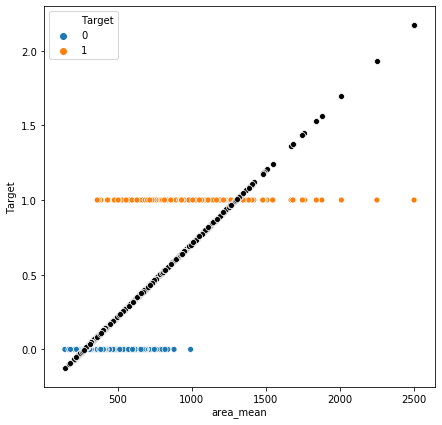

In [4]:
# Plot the resulting regression line.
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(df.area_mean, df.Target, hue=df.Target)
sns.scatterplot(df.area_mean, list(y_hat),color='black')



- According to the linear regression model, what would be your prediction if area_mean = 350?

- What about if 'area_mean' is 5?

- What about 2000?

In [5]:
lr.predict(np.array([[5],[350], [2000]]))

array([[-0.26100989],
       [ 0.07533936],
       [ 1.68396621]])

Those predictions are not within the bounds of our target's sample space. In fact, linear regression could produce predictions from **-$\infty$ to $\infty$**  


In order to fix that, we can set a threshold which determines a 0 or 1 value.
Let's set the threshhold at .5.

In [6]:
lr_prd = (y_hat > .5).astype(int)
df['lr_yhat'] = lr_prd

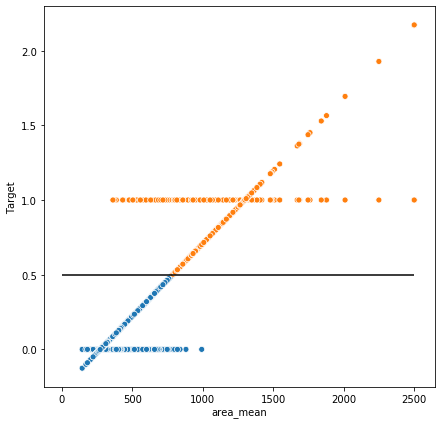

In [7]:
# Now, let's plot again
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(df.area_mean, df.Target, hue=df.Target)
sns.scatterplot(df.area_mean, list(y_hat), hue=df.lr_yhat)
ax.hlines(.5, xmin=0, xmax=2500)
ax.get_legend().remove();

Let's look at how many predictions linear regression got wrong.

In [8]:
print(f"Linear Regression missed {(df.Target != df.lr_yhat).sum()} predictions")

Linear Regression missed 82 predictions


The **confusion matrix** will be an important visualization in classification. It will allow us to see the distribution of prediction results. 

In [9]:
from sklearn.metrics import confusion_matrix

cm_lin = confusion_matrix(df.Target, df.lr_yhat)
cm_lin

array([[351,   6],
       [ 76, 136]])

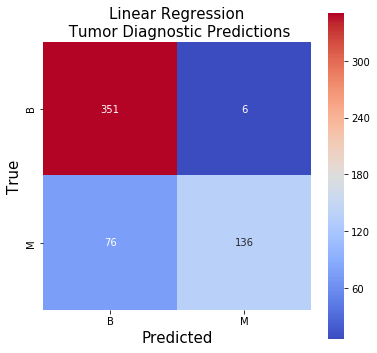

In [10]:
fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(cm_lin, annot=True, ax=ax, square=True, cmap="coolwarm", fmt='g', xticklabels=['B', 'M'],yticklabels=['B', 'M'] )
plt.rcParams.update({'font.size': 30})
ax.set_xlabel('Predicted', fontdict={'size': 15})
ax.set_ylabel('True', fontdict={'size': 15})
ax.set_title('Linear Regression\n Tumor Diagnostic Predictions', fontdict={'size': 15} )
plt.show()

# Now Let's Try Logistic Regression

In [11]:
# Note: Same module as Linear Regression
from sklearn.linear_model import LogisticRegression

# Same process: Instantiate instance of the algorithm
log_reg = LogisticRegression()

# Fit to data
log_reg.fit(df[['area_mean']], df['Target'])

# Predict 
yhat_log = log_reg.predict(df[['area_mean']])

# predict_proba: This is new!
yhat_log_proba = log_reg.predict_proba(df[['area_mean']])

df['yhat_log_proba'] = yhat_log_proba[:,1]
df['yhat_log'] = yhat_log

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


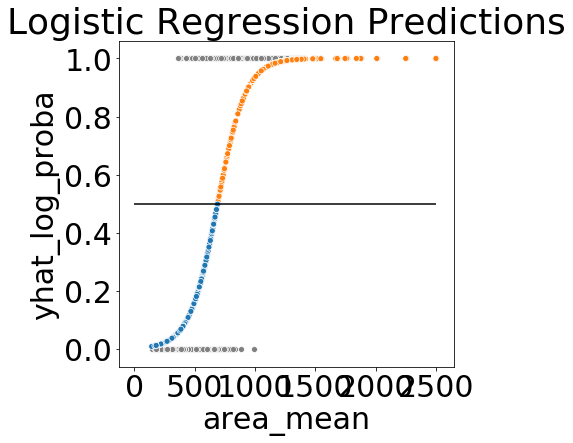

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(df.area_mean, df.Target, color='gray')
sns.scatterplot(df.area_mean, df.yhat_log_proba, hue=df.yhat_log)
ax.hlines(.5, xmin=0, xmax=2500)
ax.get_legend().remove()
ax.set_title('Logistic Regression Predictions')
plt.style.use(['default']);

Look at that nice S-shape that fits our data so much more naturally.

__Your Turn__

Use the trained logistic regression and make predictions for 

- area_mean = 350
- area_mean = 5
- area_mean = 2000

In [13]:
log_reg.predict([[5], [350],[2000]])

array([0, 0, 1])

Logistic regression's predict function automatically converts the predicted probabilities to categorical predctions.
To return the probabilities, use the `predict_proba` method.

In [14]:
log_reg.predict_proba([[5], [350],[2000]])

array([[9.97241040e-01, 2.75896023e-03],
       [9.48988707e-01, 5.10112930e-02],
       [1.28052835e-05, 9.99987195e-01]])

How did our logistic regression model compare with our linear regression?

In [15]:
print(f"Logistic Regression missed {(df.Target != df.yhat_log).sum()} predictions")

Logistic Regression missed 62 predictions


In [16]:
# Let's look at how many differences there were between our two predictions
print('Predictions that were different between Linear and Logistic:',(df.lr_yhat != df.yhat_log).sum())

Predictions that were different between Linear and Logistic: 32


In [17]:
lr_logr_diffs = df[(df.lr_yhat != df.yhat_log) & (df.yhat_log == df.Target)]
print('Predictions that Linear got wrong and Logistic got right:',lr_logr_diffs.shape[0])

Predictions that Linear got wrong and Logistic got right: 26


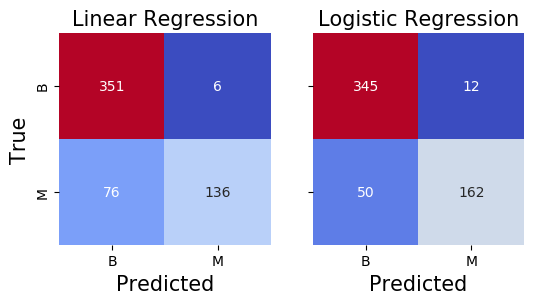

<Figure size 640x480 with 0 Axes>

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,6))

# Linear Regression Confusion Matrix
sns.heatmap(cm_lin, annot=True, ax=ax1,cbar=False, square=True, 
            cmap="coolwarm", fmt='g', xticklabels=['B', 'M'],yticklabels=['B', 'M'] )

ax1.set_xlabel('Predicted', fontdict={'size': 15})
ax1.set_ylabel('True', fontdict={'size': 15})
ax1.set_title('Linear Regression', fontdict={'size': 15} )


# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(df.Target, df.yhat_log)
sns.heatmap(cm_log, annot=True, ax=ax2,  square=True, 
            cbar=False, cmap="coolwarm", fmt='g',
            xticklabels=['B', 'M'],yticklabels=['', ''] )

ax2.set_xlabel('Predicted', fontdict={'size': 15})

ax2.set_title('Logistic Regression', fontdict={'size': 15} )
plt.show()
plt.tight_layout();

# Threshold

By default, the predict() method applies a threshold of .05 to our prediction probabilities.

In [19]:
# We see that converting all values of the column associated with the probability of a class 1 (Malignant)
# is equal to the output of the predict() method
(log_reg.predict_proba(df[['area_mean']])[:,1] > .5).astype(int) == log_reg.predict(df[['area_mean']])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

However, we may want to be more conservative in our estimate. With medical diagnostics in particular, certain errors are more important to catch.

Which errors have particularly negative consequences in the scenario above?

In [20]:
'''type II errors, false negatives, are particularly dangerous.  
A false negative means a sample was predicted to be benign, when in fact it was malignant'''

'type II errors, false negatives, are particularly dangerous.  \nA false negative means a sample was predicted to be benign, when in fact it was malignant'

To err on the side of caution, we can force our model to predict more conservatively.  

By lowering the threshold from .5, our model will predict more positive values, thereby decreasing our false negatives.  Consequently, our false positive rate will go up.

In [21]:
yhat_lower_thresh = (log_reg.predict_proba(df[['area_mean']])[:,1] > .4).astype(int)



In [22]:
cm_lower_thresh = confusion_matrix(df.Target, yhat_lower_thresh)

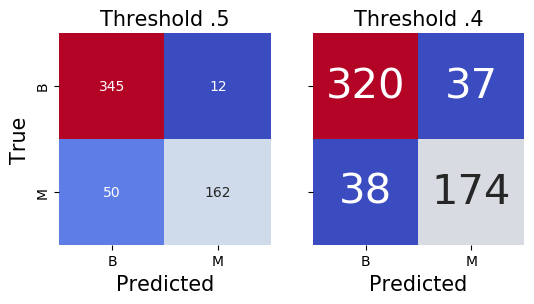

<Figure size 640x480 with 0 Axes>

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,6))

# Linear Regression Confusion Matrix
sns.heatmap(cm_log, annot=True, ax=ax1,cbar=False, square=True, 
            cmap="coolwarm", fmt='g', xticklabels=['B', 'M'],yticklabels=['B', 'M'] )
plt.rcParams.update({'font.size': 30})
ax1.set_xlabel('Predicted', fontdict={'size': 15})
ax1.set_ylabel('True', fontdict={'size': 15})
ax1.set_title('Threshold .5', fontdict={'size': 15} )


# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(df.Target, df.yhat_log)
sns.heatmap(cm_lower_thresh, annot=True, ax=ax2,  square=True, 
            cbar=False, cmap="coolwarm", fmt='g',
            xticklabels=['B', 'M'],yticklabels=['', ''] )

ax2.set_xlabel('Predicted', fontdict={'size': 15})

ax2.set_title('Threshold .4', fontdict={'size': 15} )
plt.show()
plt.tight_layout();

# 3. Logistic Regression Under the Hood

As we have seen above, linear regression outputs a value that can range anywhere from $-\infty$ to $\infty$.  

Logistic regression attempts to convert those linear outputs to a range of probabilities, i.e. a value between 0 and 1.

To make this conversion, we use the sigmoid function.

![sigmoid](https://media.giphy.com/media/GtKtQ9Gb064uY/giphy.gif)


<img src='https://cdn-images-1.medium.com/max/1600/1*RqXFpiNGwdiKBWyLJc_E7g.png' />

As ‘t’ goes to infinity, Y(predicted) will inch closer to 1, and as ‘t’ goes to negative infinity, Y(predicted) will inch closer to 0.

Using the sigmoid function above, if t = 1, the estimated probability would around .7. This tells that there is 70% chance that this observation would fall in the positive class.


In [24]:
def sigmoid(x):
    """
    params: input from linear equation
    returns: probability between 0 and 1
    """
    
    return 1/(1+np.e**(-x))



In [25]:
# Outputs of sigmoid function
print(sigmoid(0))
print(sigmoid(10))
print(sigmoid(-10))

0.5
0.9999546021312976
4.539786870243442e-05


If we substitute the product of our linear equation for x in the function above, and rephrase the objective of logistic regression as computing the probability of a class (assume positive class 1) given a set of $\beta$ parameters, our formula becomes:

$$\Large P(Class = 1|X = x) =  \frac{1}{1+e^{-(\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n)}} $$



Some arithmetic (see appendix) allows us to see what the linear equation represents in our logistic regression:
<br><br>
    $\ln{\dfrac{ P(G = 1|X = x) }{P(G = 0|X =x)}} = \beta_0 + \beta_1*X_1 + \beta_2*X_2...\beta_n*X_n$
    

Our linear function calculates the log of the probability we predict 1, divided by the probability of predicting 0.  In other words, the linear equation is calculating the **log of the odds** that we predict a class of 1.
    

**Let's produce the log odds for the fourth observation in our dataset**

In [26]:
log_odds_sample_4 = log_reg.coef_[0] * df.area_mean.iloc[3] + log_reg.intercept_

In [27]:
log_odds_sample_4

array([-2.61291196])

Now, apply the sigmoid function above to convert the log-odds back to a probability.

In [28]:
sigmoid(log_odds_sample_4[0])

0.06831203732950354

Let's check out work with sklearn's `predict_proba` method. 

In [29]:
log_reg.predict_proba([[df.area_mean.iloc[3]]])

array([[0.93168796, 0.06831204]])

## 4. Interpreting Logistic Regression Coefficients

[This ucla article is an excellent resource](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/)

To interpet the coefficients:
1. Use the coefficient as the exponent to *e* `np.exp(coefficient)`
2. If the ones place contains a 1, then you can interpret that coefficient by dropping everying before the decimal place and moving the decimal two places to the right. This becomes the percentage change of the odds for a positive result with a 1 unit increase in the independent variable.
    - If the ones place contains a 2, then you add 100 to the percentage, resulting in a `100%+` change in odds. 
The TL;DR is  can interpret coefficients, as: "With a 1 unit increase in the independent variable, you would expect to see a 

If we have a coefficient of .1229589, we would do the following:

In [30]:
np.exp(.1229589)

1.130837942552926

Based on this output, we would describe the relationship as:
> "With a 1 unit increase in the independent variable, we would expect to see a 13% increase in the odds of a positive result"

Interpreting our model coefficient:

In [31]:
log_reg.coef_[0][0]

0.00859938772943465

In [32]:
np.exp(0.00859938772943465)

1.0086364686790361

"With a 1 unit increase in area mean, we would expect to see a .86% increase in the odds of a positive result"

# 6. Hyperparameter Tuning the C Variable

We have discussed 'L1' (lasso)  and 'L2' (ridge) regularization.  If you looked at the docstring of Sklearn's Logistic Regression function, you may have noticed that we can specify different types of regularization when fitting the model via the `penalty` parameter.

We can also specificy the strength of the regularization via the `C` parameter. `C` is the inverse regularization strength.  So, a low `C` means high regularization strength.

Let's run through our train test split process, and tune our C parameter.   

In [33]:
y = df.Target
X = df.drop(["Target", "diagnosis"], axis=1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

Scaling is important when implementing regularization, since it penalizes the magnitude of the coefficients.

To correctly implement scaling, we scale only on the training data.

# Pair Annotation

With a partner, put annotations after the empty # comments in the KFold implementation below.

In [35]:

from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler

c_accuracy = {}

# Instantiate a Kfolds instance which we will use to split training into 4 parts
kf = KFold(n_splits=4)
# Cycle through a series of 100 numbers equally spaced beteen 1 and 1000
# To be used as the C parameter in the logistic regression models fit below
cs = np.linspace(1,11,100)
for c in cs:
    
    mean_accuracy = []
    
    # Loop through the KFold splits (total of 4 loops), each time reserving a different
    # quarter of the training data as the validation data
    for train_ind, val_ind in kf.split(X_train, y_train):
        
        X_tt, y_tt = X_train.iloc[train_ind], y_train.iloc[train_ind]
        X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
        
        ss = StandardScaler()
        
        
        # Fit the scaler to the training data for each loop.
        # Then transform the validation set.
        # This will prevent data leakage.
        
        X_tt = ss.fit_transform(X_tt)
        X_val = ss.transform(X_val)
        
        # Fit the logistic regression with the c candidate value
        # linked to the current step in the loop.
        log_reg = LogisticRegression(C=c, solver='lbfgs', max_iter=400)
        
        log_reg.fit(X_tt, y_tt)
        
        mean_accuracy.append(log_reg.score(X_val, y_val))
    
    # Calculate the mean accuracy score of all validation sets (4 in total)
    # related to the c value of the previous loop
    # and add to the dictionary outside of the loop to store the progress.
    c_accuracy[c] = np.mean(mean_accuracy)


In [36]:
sorted(c_accuracy.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(1.606060606060606, 0.9811982013754188),
 (1.7070707070707072, 0.9811982013754188),
 (1.808080808080808, 0.9811982013754188),
 (1.9090909090909092, 0.9811982013754188),
 (2.0101010101010104, 0.9811982013754188),
 (2.111111111111111, 0.9811982013754188),
 (2.212121212121212, 0.9811982013754188),
 (2.313131313131313, 0.9811982013754188),
 (2.4141414141414144, 0.9811982013754188),
 (2.515151515151515, 0.9811982013754188)]


Now that we have selected a C hyperparameter that performs well, fit to the entire training set.

In [37]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
log_reg = LogisticRegression(C=2, solver='lbfgs', max_iter=5000)
log_reg.fit(X_train_sc, y_train)

y_hat = log_reg.predict(X_train_sc)

Text(0.5, 1, 'Logistic Regression: C2')

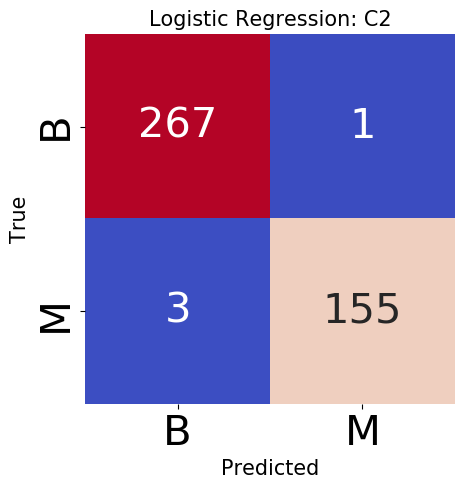

In [38]:
fig, ax = plt.subplots()
cm = confusion_matrix(y_train, y_hat)
sns.heatmap(cm, ax=ax, annot=True,  square=True, 
            cbar=False, cmap="coolwarm", fmt='g',
            xticklabels=['B', 'M'],yticklabels=['B', 'M'] )

ax.set_xlabel('Predicted', fontdict={'size': 15})
ax.set_ylabel('True', fontdict={'size': 15})
ax.set_title('Logistic Regression: C2', fontdict={'size': 15})

We can adjust the threshold to catch more false positives.

In [39]:
y_hat = (log_reg.predict_proba(X_train_sc)[:,1] >.4).astype(int)

Text(0.5, 1, 'Logistic Regression: Threshold .4')

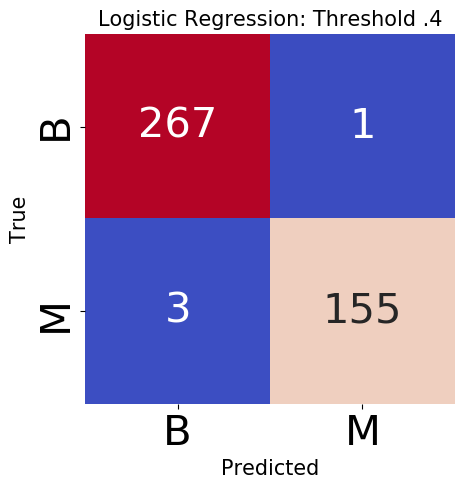

In [40]:
fig, ax = plt.subplots()
cm = confusion_matrix(y_train, y_hat)
sns.heatmap(cm, ax=ax, annot=True,  square=True, 
            cbar=False, cmap="coolwarm", fmt='g',
            xticklabels=['B', 'M'],yticklabels=['B', 'M'] )

ax.set_xlabel('Predicted', fontdict={'size': 15})
ax.set_ylabel('True', fontdict={'size': 15})
ax.set_title('Logistic Regression: Threshold .4', fontdict={'size': 15})

# Now apply to the test set

In [41]:
X_test_sc = ss.transform(X_test)

In [42]:
y_hat = (log_reg.predict_proba(X_test_sc)[:,1] >.4).astype(int)

Text(0.5, 1, 'Holdout Test Results')

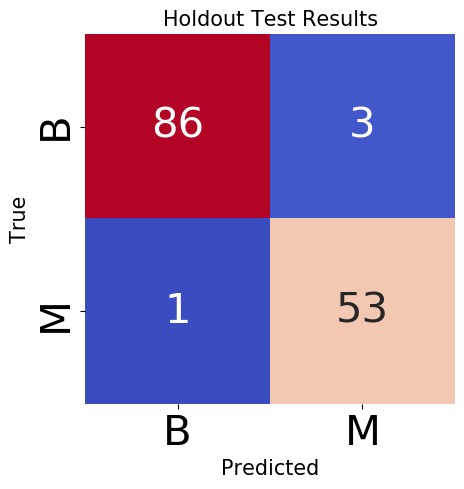

In [43]:
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, ax=ax, annot=True,  square=True, 
            cbar=False, cmap="coolwarm", fmt='g',
            xticklabels=['B', 'M'],yticklabels=['B', 'M'] )

ax.set_xlabel('Predicted', fontdict={'size': 15})
ax.set_ylabel('True', fontdict={'size': 15});
ax.set_title('Holdout Test Results', fontdict={'size': 15})

With our logistic regression coefficients, we can inspect which features our model thinks are most important for the different classifications.

In [44]:
beta_values = {name:coef for name, coef in zip(list(X_test.columns), list(log_reg.coef_[0]))}
col = [item[0] for item in sorted(beta_values.items(), key= lambda kv: kv[1], reverse=True)]
beta = [item[1] for item in sorted(beta_values.items(), key= lambda kv: kv[1], reverse=True)]

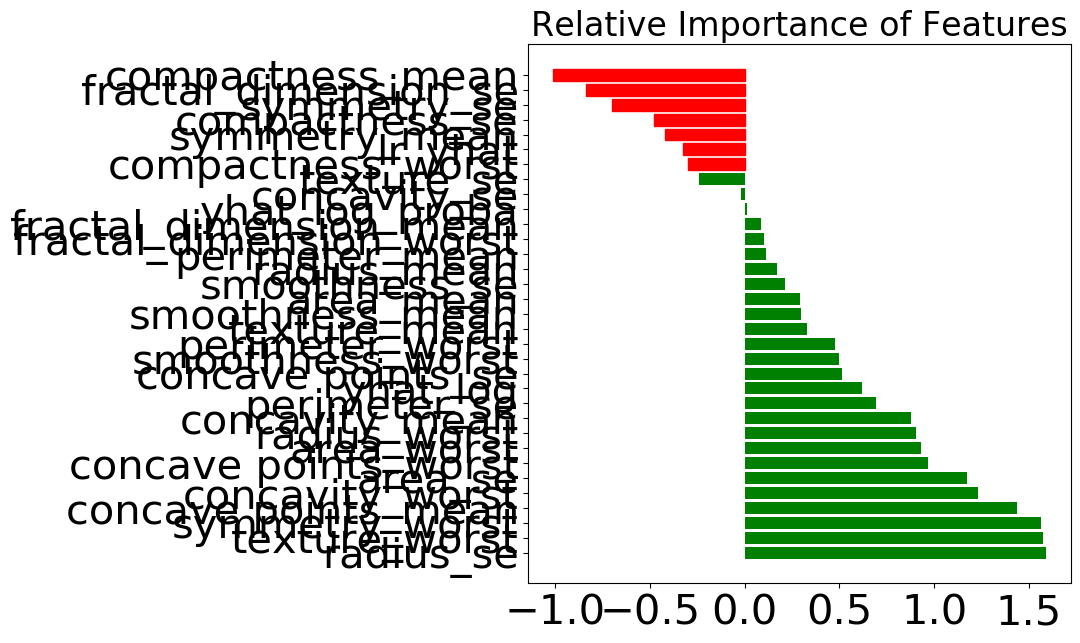

In [45]:
fig, ax = plt.subplots(figsize=(7,7))

plt.rcParams.update({'font.size': 20})

bars = ax.barh(col,beta, color='g')
  
for bar in range(1,8):
    bars[-bar].set_color('red')

ax.set_title('Relative Importance of Features');

# 8. Assumptions of Logistic Regression

Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, and homoscedasticity.

First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  

**The following assumptions still apply:**

1.  Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

2. Logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

3. Logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

4. Logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

5. Logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).

# Appendix: Converting sigmoid to log-odds.

If we substitute the product of our linear equation for x in the function above, and rephrase the objective of logistic regression as computing the probability of a class (assume positive class 1) given a set of $\beta$ parameters, our formula becomes:

$$\Large P(Class = 1|X = x) =  \frac{1}{1+e^{-(\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n)}} $$



Now, with some arithmetic:

You can show that, by multiplying both numerator and denominator by $e^{(\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n)}$


$$ \Large P(G = 1|X = x) = \displaystyle \frac{e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}{1+e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}$$

As a result, you can compute:

$$ \Large P(G = 0|X =x) = 1- \displaystyle \frac{e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}{1+e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}= \displaystyle \frac{1}{1+e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}$$


Further:

$$ \Large \dfrac{ P(G = 1|X = x) }{P(G = 0|X =x)} = e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n} $$

This expression can be interpreted as the *odds in favor of class 1*.  

## Probability and odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

This expression can be interpreted as the *odds in favor of class 1*.  

$$ \Large \dfrac{ P(G = 1|X = x) }{P(G = 0|X =x)} = e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n} $$



Finally, taking the log of both sides leads to:
<br><br>
    $\ln{\dfrac{ P(G = 1|X = x) }{P(G = 0|X =x)}} = \beta_0 + \beta_1*X_1 + \beta_2*X_2...\beta_n*X_n$
    
Here me can see why we call it logisitic regression.

Our linear function calculates the log of the probability we predict 1, divided by the probability of predicting 0.  In other words, the linear equation is calculating the **log of the odds** that we predict a class of 1.
    